## Import libraries

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data visualization on a few samples

Let's look at 5 random controls and 5 random PanIN samples. This is only to start to get an idea of what the spectrometry data looks like. 

First things first. The data files have very long names. I couldn't find out if thesse names were associated with some kind of information. I will start off by renaming all files in each folder to something more digestible. I may have to revisit this step if the file name do in fact, turn out to be important. Only one way to find out. 

In [327]:
import os

# Switch to folder with 'control' files
os.chdir(r'C:\Users\sriha\OneDrive\Desktop\DS\My work\diagnosing-pancreatic-cancer\Data\02-Control')

# Check if I'm in the right directory
#print(os.getcwd())

# Create arrays to store new file names
control_samples = []
panIN_samples = []

# Rename files in the Control folder
for file in os.listdir():
    #print(file)     # Get file names
    #print(os.path.splitext(file))     # Separate file name from extension
    file_name, file_ext = os.path.splitext(file)     # Store the file name and extensions
    new_name = '{}{}'.format(file_name.split('_')[0], file_ext)     # Grab the first identifying number for each file
    #print(new_name)     # Confirm that the name tghwe have the name we want
    os.rename(file,new_name)     # Rename files
    control_samples.append(file)     # Append new file names to array
    
# Rename files in the PanIN folder
os.chdir(r'C:\Users\sriha\OneDrive\Desktop\DS\My work\diagnosing-pancreatic-cancer\Data\03-PanIN')
for file in os.listdir():
    file_name, file_ext = os.path.splitext(file)     # Store the file name and extensions
    new_name = '{}{}'.format(file_name.split('_')[0], file_ext)     # Grab the first identifying number for each file
    #print(new_name)     # Confirm that the name we have the name we want
    os.rename(file,new_name)     # Rename files
    panIN_samples.append(file)     # Append new file names to array
    
print(len(control_samples))
print(len(panIN_samples))

101
80


So we have 101 control samples and 80 PanIN samples. Not the biggest sample size but we work with what we have. 

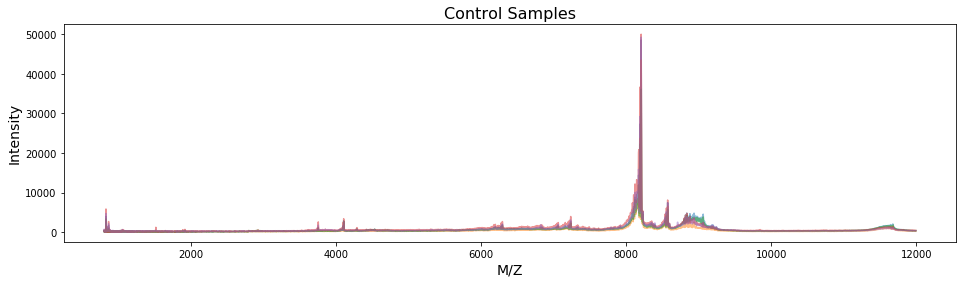

In [328]:
# Plot 5 random control samples
plt.figure(figsize=(16,4))
plt.xlabel('M/Z', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Control Samples', fontsize=16)

# Read in 5 random Control samples
for i in range(0,5):
    n = np.random.randint(low=0, high=len(control_samples))
    cs = pd.read_csv(r'C:\Users\sriha\OneDrive\Desktop\DS\My work\diagnosing-pancreatic-cancer\Data\02-Control\{}'.format(control_samples[n]))
    plt.plot(cs['M/Z'], cs['Intensity'], alpha=0.5)

On a quick (and crude) visual inspection, the spectrometry files seem to show consistent peaks for the 5 random control samples. Let's try the same for the PanIN samples.

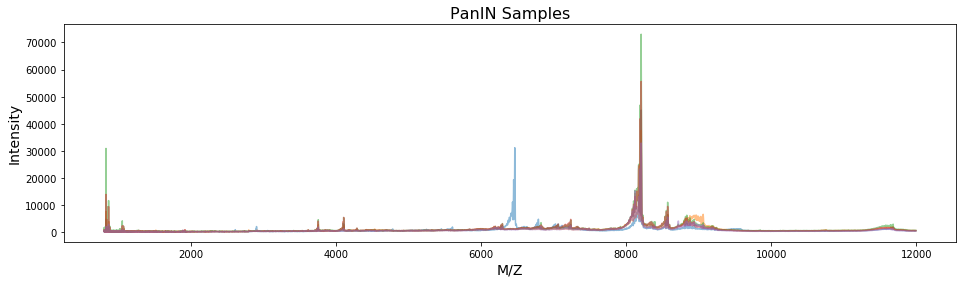

In [329]:
# Plot 5 random PanIN samples
plt.figure(figsize=(16,4))
plt.xlabel('M/Z', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('PanIN Samples', fontsize=16)

# Read in 5 random PanIN samples
for i in range(0,5):
    n = np.random.randint(low=0, high=len(panIN_samples))
    ps = pd.read_csv(r'C:\Users\sriha\OneDrive\Desktop\DS\My work\diagnosing-pancreatic-cancer\Data\03-PanIN\{}'.format(panIN_samples[n]))
    plt.plot(ps['M/Z'], ps['Intensity'], alpha=0.5)

Some PanIN samples show random peaks, but overall the peaks still seem fairly consistent. Now let's compare the controls and PanIN samples.

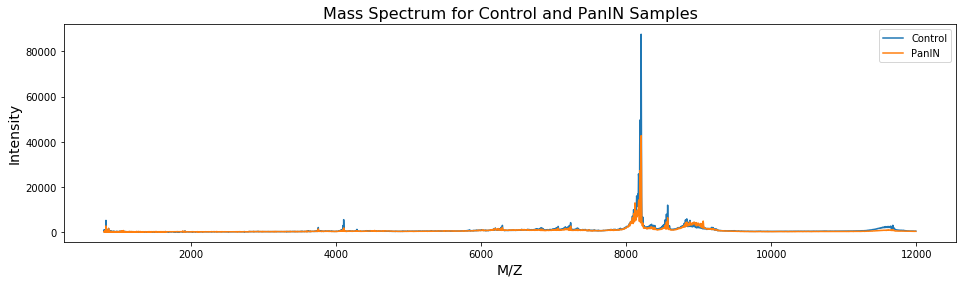

In [330]:
n = np.random.randint(low=0, high=len(control_samples))
cs = pd.read_csv(r'C:\Users\sriha\OneDrive\Desktop\DS\My work\diagnosing-pancreatic-cancer\Data\02-Control\{}'.format(control_samples[n]))
m = np.random.randint(low=0, high=len(panIN_samples))
ps = pd.read_csv(r'C:\Users\sriha\OneDrive\Desktop\DS\My work\diagnosing-pancreatic-cancer\Data\03-PanIN\{}'.format(panIN_samples[m]))
                                                                                                                      
plt.figure(figsize=[16,4])
plt.plot(cs['M/Z'], cs['Intensity'], label='Control')
plt.plot(ps['M/Z'], ps['Intensity'], label='PanIN')
plt.xlabel('M/Z', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Mass Spectrum for Control and PanIN Samples', fontsize=16)
plt.legend()
plt.savefig(r'C:\Users\sriha\OneDrive\Desktop\DS\My work\diagnosing-pancreatic-cancer\Figures\Mass Spectrum.png')

If we were to just try to visually compare the spectra for a control and a PanIN sample, we could identify some peaks fairly well. But it would be quite difficult to identify all the key biomarkers. This is why we are trying to train a model to do this for us! 

In [331]:
cs.head()

,M/Z,Intensity
0,800.00000,221.0
1,800.32000,302.0
2,800.64014,100.0
3,800.96040,314.0
4,801.28076,1081.0


### Noise Reduction and Scaling Data
The idea here is to reduce noise and scale the data without losing any information. Using a standard scaler object did not seem to give good results, so I have attempted to manually scale the data. 

In [332]:
# Baseline subtraction: Subtract the median of the bottom 5% of intensity values from all the values. 
# This should capture some of the noise. Might have to play around a little bit to make sure no information is lost. 
# Update: Did not apply baseline subtraction becasue this was affecting the results unfavorably

#bottom5_median = np.median(np.sort(cs['Intensity'])[:len(cs['Intensity'])//5])
#cs = cs[cs['M/Z'] < 11000]

# Make sure that the lowest values are 0 and not negative
cs['Intensity'] = cs['Intensity'].apply(lambda x: x if x > 0 else 0)
cs.head()

,M/Z,Intensity
0,800.00000,221.0
1,800.32000,302.0
2,800.64014,100.0
3,800.96040,314.0
4,801.28076,1081.0


In [333]:
# Rescaling: Divide all the values by the highest intensity value
cs['Intensity'] = cs['Intensity'] / np.max(cs['Intensity'])

# Take the square root to 'compress' the intensity values a little. 
# The actual intensity values are not important. We just need to be able to identify and visualize the peaks.  
cs['Intensity'] = np.sqrt(cs['Intensity'])
cs.head()

,M/Z,Intensity
0,800.00000,0.050221
1,800.32000,0.058708
2,800.64014,0.033783
3,800.96040,0.059863
4,801.28076,0.111072


In [334]:
cs.describe()

,M/Z,Intensity
count,6771.000000,6771.000000
mean,4134.434794,0.065303
std,3059.113720,0.045100
min,800.000000,0.028666
25%,1574.160100,0.039252
50%,3097.470200,0.050108
75%,6094.888700,0.071902
max,11992.908000,1.000000


Let's now visualize this information as a colorbar, along with the spectrogram. The colorbar is simly a different way to visualize the spectrogram information. The more yellow the vertical line, the higher the intensity at that M/Z value. 

Note that most of the colorbar here will be blue, meaning the intensities for most of the M/Z values are near zero. The colorbar would be alot more useful if the intensity values were normalized from the device at the time of data collection. 


Note: This is  a colorbar for a single sample. Once all the samples are combined into a dataset, the rows will  refer to the corresponding sample number.

Text(0.5, 0, 'M/Z')

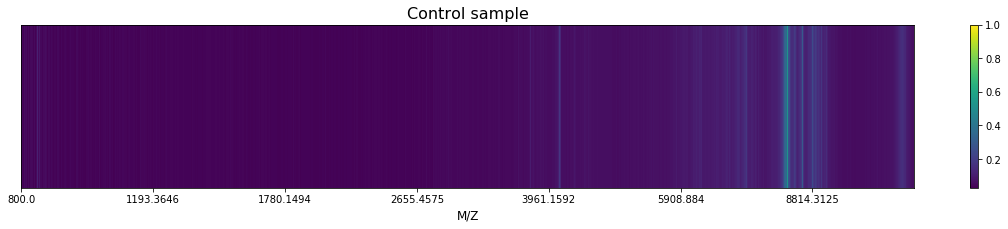

In [335]:
# Plot the spectrogram as a colorbar
cs.set_index('M/Z')
plt.figure(figsize =(20,3))
plt.title('Control sample', fontsize = 16)
plt.imshow(cs['Intensity'][np.newaxis,:], aspect='auto', cmap='viridis')#, extent=[0,max(cs['M/Z']),2,0])
plt.yticks([])
plt.xticks(np.arange(0,7000,1000), cs['M/Z'][0:7000:1000])
plt.colorbar()
plt.xlabel('M/Z', fontsize = 12)

In order to identify the M/Z value for the associated peak, let's plot the spectrogram in an interactive plot. Note that intensity here actually refers to the scaled intensity. 

In [336]:
px.line(cs, x=cs['M/Z'],y=cs['Intensity'], width = 1000, height = 300, title='Mass Spectrum')

## Scaling and Visualization on all Samples

### Combine all the samples into a single DataFrame
We want the rows to represent samples, and the columns to represent different M/Z values. 

The following steps are employed to achieve this:
* Step 1: Define a function that: 
    * Reads in a csv file from a specified path,
    * Applies the necessary scaling transformations,
    * Converts the rows to columns as required, and
    * Returns transformed DataFrame.
* Step 2: Define a function that combines all the transformed DataFrames (i.e. appends to a previously defined DataFrame 
* Step 3: Call the functions!

In [337]:
cs = cs.set_index('M/Z')

In [338]:
cs.transpose()

M/Z,800.00000,800.32000,800.64014,800.96040,801.28076,801.60126,801.92190,802.24260,802.56354,802.88460,...,11949.82000,11954.60100,11959.38300,11964.16700,11968.95300,11973.74000,11978.52900,11983.32000,11988.11300,11992.90800
Intensity,0.050221,0.058708,0.033783,0.059863,0.111072,0.049188,0.051122,0.079658,0.052008,0.06542,...,0.070378,0.072219,0.069563,0.069234,0.067227,0.068488,0.068238,0.067734,0.0662,0.069069


Define the transformation and scaling function:

In [339]:
def transform_data(file_path):
    df = pd.read_csv(file_path)
    
    # Ensure there are no negative values
    df['Intensity'] = df['Intensity'].apply(lambda x: x if x > 0 else 0)
    
    # Rescaling: Divide all the values by the highest intensity value
    df['Intensity'] = df['Intensity'] / np.max(df['Intensity'])
    
    # Take the square root to 'compress' the intensity values a little. 
    # The actual intensity values are not important. We just need to be able to identify and visualize the peaks.  
    df['Intensity'] = np.sqrt(df['Intensity'])
    
    # Transpose the data as shown in the example above
    df = df.set_index('M/Z')
    df_transformed = df.transpose()
    
    return df_transformed

Define a function to read and combine all the samples:

In [340]:
def combine_data(folder_path):
    df = pd.DataFrame()
    for file in os.listdir(folder_path):
        transformed = transform_data(file)
        df = pd.concat((df,transformed), ignore_index=True)
        
    return df       

These are the folders the files are stored in:

In [341]:
# Control Samples are stored here
control_path = r'C:\Users\sriha\OneDrive\Desktop\DS\My work\diagnosing-pancreatic-cancer\Data\02-Control'

# PanIN samples are stored here
panIN_path = r'C:\Users\sriha\OneDrive\Desktop\DS\My work\diagnosing-pancreatic-cancer\Data\03-PanIN'

Call functions to make the combined dataset with all samples for each group

In [342]:
os.chdir(control_path)
df_control = combine_data(os.getcwd())

os.chdir(panIN_path)
df_panIN = combine_data(os.getcwd())

Define a function to combine the control and panIN samples, and add a binary column titled 'has disease' to identify the sample

In [343]:
def create_data_result(disease_group, control_group):
    disease_group['has disease'] = 1
    control_group['has disease'] = 0
    df = pd.concat((disease_group, control_group), ignore_index=True)
    return df

The data frame below now has both the control and disease datasets combined, along with an identifying column titled 'has disease'

In [344]:
df_full= create_data_result(df_panIN, df_control)

Define a function to create a combined colorbar for all the samples in each group

In [345]:
df_control.head()

M/Z,800.0,800.32,800.6401400000001,800.9604,801.28076,801.6012599999999,801.9219,802.2426,802.56354,802.8846,...,11954.601,11959.383,11964.167,11968.953000000001,11973.74,11978.528999999999,11983.32,11988.113000000001,11992.908000000001,has disease
0,0.048977,0.055239,0.032651,0.069065,0.069595,0.035093,0.057281,0.057120,0.040560,0.063447,...,0.075120,0.072442,0.073388,0.071741,0.070644,0.070644,0.068127,0.069661,0.071549,0
1,0.063804,0.065277,0.038023,0.084348,0.086574,0.041683,0.065858,0.071490,0.041986,0.068408,...,0.072982,0.075460,0.075292,0.071401,0.072721,0.074445,0.074274,0.071579,0.071490,0
2,0.041567,0.051457,0.033495,0.047606,0.124069,0.049682,0.042501,0.079335,0.054010,0.061944,...,0.060478,0.060012,0.060105,0.060105,0.060385,0.061307,0.057725,0.057919,0.053906,0
3,0.050221,0.058708,0.033783,0.059863,0.111072,0.049188,0.051122,0.079658,0.052008,0.065420,...,0.072219,0.069563,0.069234,0.067227,0.068488,0.068238,0.067734,0.066200,0.069069,0
4,0.047761,0.052860,0.031015,0.063706,0.065548,0.036195,0.047953,0.053463,0.038524,0.067137,...,0.063706,0.061808,0.064987,0.064064,0.061585,0.061287,0.061287,0.061362,0.060762,0


In [346]:
def combined_colorbar(dataset):
    plt.figure(figsize=(20,5))
    plt.imshow(dataset, aspect='auto', cmap='viridis')
    plt.yticks(np.arange(0,len(dataset)+1, 10))
    plt.colorbar()

Text(0, 0.5, 'Samples')

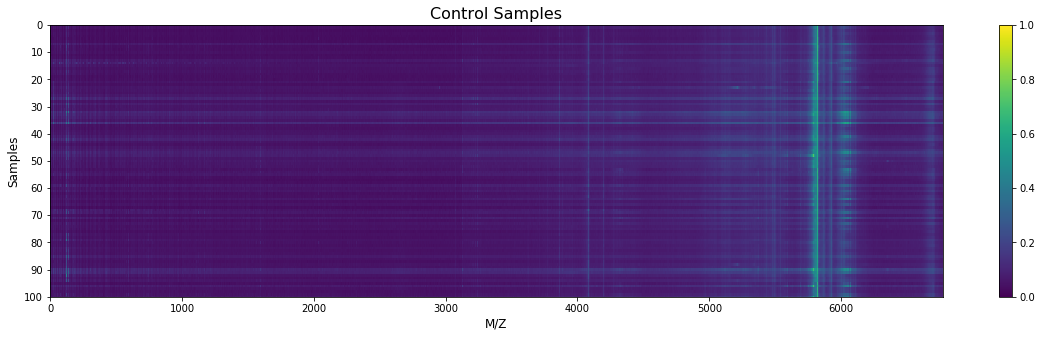

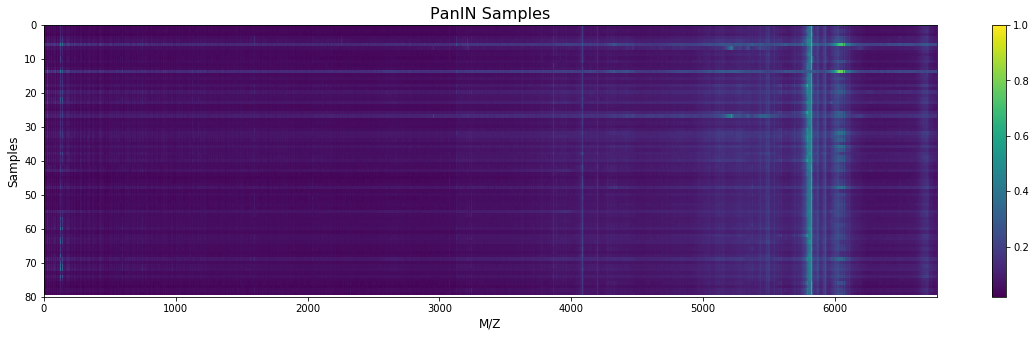

In [347]:
combined_colorbar(df_control)
plt.title('Control Samples', fontsize = 16)
plt.xlabel('M/Z', fontsize = 12)
plt.ylabel('Samples', fontsize = 12)

combined_colorbar(df_panIN)
plt.title('PanIN Samples', fontsize = 16)
plt.xlabel('M/Z', fontsize = 12)
plt.ylabel('Samples', fontsize = 12)
